<a href="https://colab.research.google.com/github/M0STAFA-MO/emotion_plus/blob/main/new_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training the model...
Episode 0: epsilon = 0.720
Episode 2: epsilon = 0.461
Episode 4: epsilon = 0.295
Episode 6: epsilon = 0.189
Episode 8: epsilon = 0.121

Model Performance:
Accuracy: 97.68%
Precision: 97.78%

Displaying Results...

Correct Classifications:
Total correct classifications: 3585


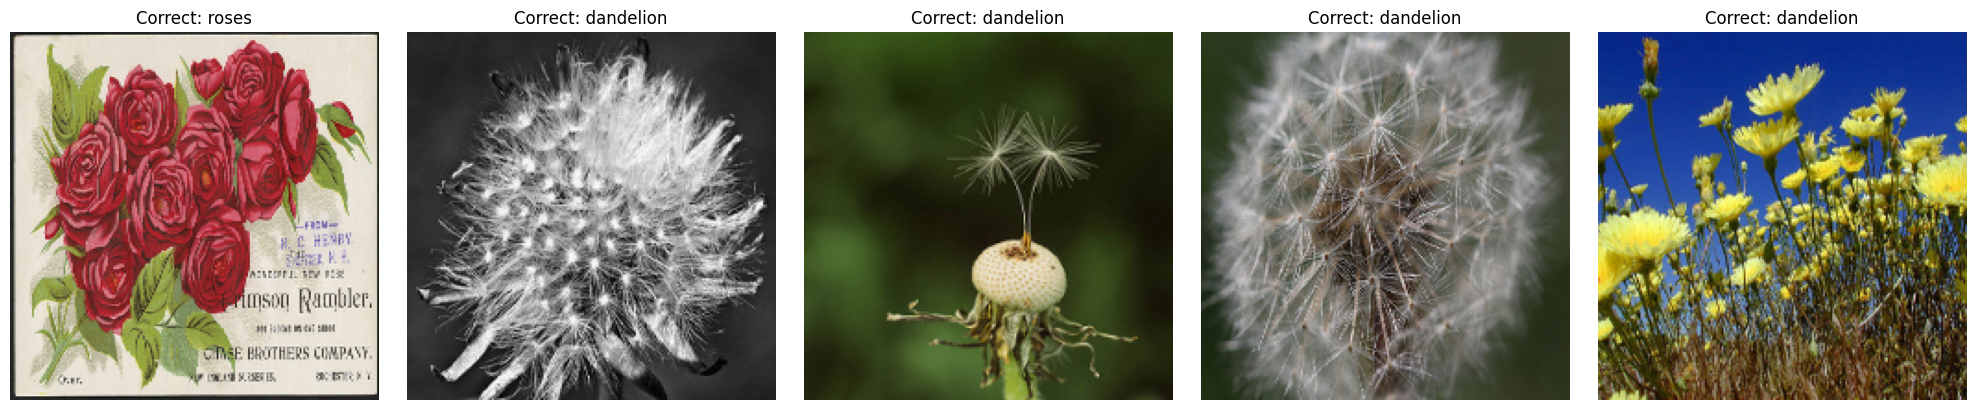


Incorrect Classifications:
Total incorrect classifications: 85


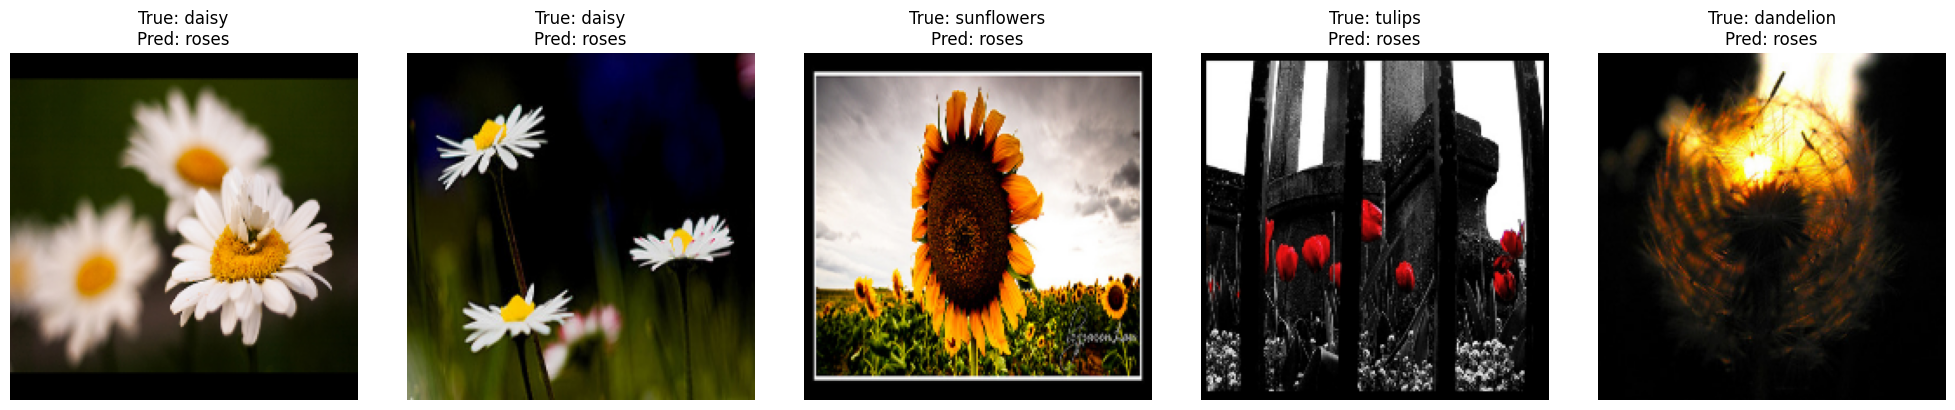

In [ ]:
# @title  *Q_learning*

import numpy as np
from collections import defaultdict
import cv2
import glob
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Define folders and data loading
folders = {
    'daisy': r'/content/drive/MyDrive/Colab Notebooks/flower_photos/daisy/*.jpg',
    'dandelion': r'/content/drive/MyDrive/Colab Notebooks/flower_photos/dandelion/*.jpg',
    'roses': r'/content/drive/MyDrive/Colab Notebooks/flower_photos/roses/*.jpg',
    'sunflowers': r'/content/drive/MyDrive/Colab Notebooks/flower_photos/sunflowers/*.jpg',
    'tulips': r'/content/drive/MyDrive/Colab Notebooks/flower_photos/tulips/*.jpg'
}

def load_images(folder_path, label):
    images = []
    paths = []  # Store image paths
    for img_path in glob.glob(folder_path):
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (128, 128))
            hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
            feature_vector = hsv.flatten()[:70]
            images.append((feature_vector, label))
            paths.append(img_path)
    return images, paths

# Load data
data = []
image_paths = []
label_mapping = {label: idx for idx, label in enumerate(folders.keys())}
for label, folder in folders.items():
    folder_data, folder_paths = load_images(folder, label_mapping[label])
    data.extend(folder_data)
    image_paths.extend(folder_paths)

features, labels = zip(*data)
features = np.array(features)
labels = np.array(labels)

# 2. Q-Learning setup
num_states = features.shape[1]
num_actions = len(label_mapping)
learning_rate = 0.1
discount_factor = 0.95
epsilon_start = 0.9
epsilon_end = 0.1
epsilon_decay = 0.8
episodes = 10

q_table = defaultdict(lambda: np.zeros(num_actions))

def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)
    else:
        return np.argmax(q_table[state])

def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    td_target = reward + discount_factor * q_table[next_state][best_next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += learning_rate * td_error

# 3. Training
print("Training the model...")
epsilon = epsilon_start
for episode in range(episodes):
    for feature, true_label in zip(features, labels):
        state = tuple(np.round(feature, 2))
        action = choose_action(state, epsilon)
        reward = 2 if action == true_label else -1
        next_state = state
        update_q_table(state, action, reward, next_state)

    epsilon = max(epsilon_end, epsilon * epsilon_decay)
    if episode % 2 == 0:
        print(f"Episode {episode}: epsilon = {epsilon:.3f}")

# 4. Prediction and Evaluation
y_pred = []
for feature in features:
    state = tuple(np.round(feature, 2))
    action = np.argmax(q_table[state])
    y_pred.append(action)

accuracy = accuracy_score(labels, y_pred)
precision = precision_score(labels, y_pred, average='weighted')
print(f'\nModel Performance:')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')



def show_classifications(correct=True):
    reverse_mapping = {v: k for k, v in label_mapping.items()}
    if correct:
        indices = np.where(labels == y_pred)[0]
        title = "Correct Classifications"
    else:
        indices = np.where(labels != y_pred)[0]
        title = "Incorrect Classifications"

    print(f"\n{title}:")
    print(f"Total {title.lower()}: {len(indices)}")

    # Show sample images
    n_samples = min(5, len(indices))
    fig, axes = plt.subplots(1, n_samples, figsize=(20, 4))

    for i, idx in enumerate(np.random.choice(indices, n_samples, replace=False)):
        img = cv2.imread(image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (200, 200))

        true_label = reverse_mapping[labels[idx]]
        pred_label = reverse_mapping[y_pred[idx]]

        axes[i].imshow(img)
        axes[i].axis('off')
        if correct:
            axes[i].set_title(f'Correct: {true_label}')
        else:
            axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')

    plt.tight_layout()
    plt.show()

# 6. Show Results
print("\nDisplaying Results...")

show_classifications(correct=True)
show_classifications(correct=False)

In [ ]:

# @title *Explanation*
from IPython.display import display, HTML
with open('explanation.html', 'w', encoding='utf-8') as f:
    f.write("""<!DOCTYPE html>
<html dir="rtl" lang="ar">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>نظام التعرف على الوجوه والمشاعر - شرح تفصيلي</title>
    <style>
        body {
            font-family: "Traditional Arabic", "Simplified Arabic", Arial, sans-serif;
            line-height: 1.8;
            color: #2d2d2d;
            max-width: 1000px;
            margin: 0 auto;
            padding: 20px;
            background-color: #fcfcfc;
        }

        .container {
            background-color: white;
            padding: 25px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.05);
        }

        h1, h2, h3 {
            color: #003366;
            font-family: "Traditional Arabic", "Simplified Arabic", Arial, sans-serif;
        }

        .intro {
            background-color: #f9f9f9;
            padding: 20px;
            border-right: 4px solid #003366;
            margin: 20px 0;
        }

        .code-section {
            background-color: #f8f9fa;
            padding: 15px;
            border-radius: 5px;
            direction: ltr;
            font-family: Consolas, monospace;
            margin: 15px 0;
        }

        .results {
            background-color: #f0f7ff;
            padding: 20px;
            border-radius: 5px;
            margin: 15px 0;
        }

        table {
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
        }

        th, td {
            border: 1px solid #ddd;
            padding: 12px;
            text-align: center;
        }

        th {
            background-color: #f5f5f5;
        }

        .note {
            background-color: #fff3cd;
            padding: 15px;
            border-radius: 5px;
            margin: 15px 0;
        }

        .concept {
            background-color: #f0f7ff;
            padding: 20px;
            border-radius: 5px;
            margin: 15px 0;
        }

        .process-step {
            background-color: #f9f9f9;
            padding: 15px;
            margin: 10px 0;
            border-right: 4px solid #003366;
        }

        .example {
            background-color: #e9ecef;
            padding: 15px;
            border-radius: 5px;
            margin: 15px 0;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>مشروع التخرج: نظام التعرف على النوع والمشاعر من الصور</h1>

        <div class="intro">
            <p>المشروع عبارة عن نظام بيقدر يحلل الصور ويتعرف على نوع الشخص (ذكر/أنثى) ومشاعره. استخدمت فيه تقنيات التعلم العميق والتعلم الآلي، وحققت نتائج كويسة جداً.</p>
        </div>

        <div class="concept">

            <h1>تقنية ResNet50 المستخدمة</h1>
            <p>ResNet50 ده شبكة عصبية عميقة مكونة من 50 طبقة، وليها مميزات مهمة جداً خلتني أختارها للمشروع:</p>
            <ul>
                <li>بتحل مشكلة تلاشي التدرج (Vanishing Gradient) اللي بتحصل في الشبكات العميقة</li>
                <li>فيها اتصالات متخطية (Skip Connections) بتساعد في نقل المعلومات بين الطبقات</li>
                <li>تم تدريبها على مجموعة ImageNet (أكتر من مليون صورة)</li>
                <li>بتقدر تستخرج سمات معقدة زي الأشكال والأنماط من الصور</li>
            </ul>
        </div>
        <div class="section">
            <h2>رسم توضيحيـ ResNet</h2>
            <img class="resnet-diagram" src="https://wisdomml.in/wp-content/uploads/2023/03/resnet.png" alt="ResNet Diagram">
        </div>
        <div class="section">
            <h2>مكونات النظام</h2>

            <h3>1. نموذج تحديد النوع</h3>
            <p>النموذج ده بيحدد نوع الشخص من الصورة، واستخدمت فيه:</p>
            <ul>
                <li>شبكة ResNet50 لاستخراج السمات المميزة من الصور</li>
                <li>حجم الصور 96×96 بكسل (لقيت إن ده أفضل حجم للدقة والسرعة)</li>
                <li>خوارزمية SVM للتصنيف النهائي</li>
            </ul>

            <div class="code-section">
                <p>// الكود الأساسي للنموذج الأول</p>
                base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

                def extract_ResNet50_features(image_path):
                    img = load_img(image_path, target_size=(96, 96))
                    img_array = img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    img_array = preprocess_input(img_array)
                    features = base_model.predict(img_array)
                    return features.flatten()
            </div>

            <div class="process-step">
                <h1>عملية استخراج السمات:</h1>
                <ol>
                    <li>المعالجة الأولية للصور:
                        <ul>
                            <li>تغيير حجم الصورة للأبعاد المطلوبة</li>
                            <li>تحويل الصورة لمصفوفة أرقام</li>
                            <li>تطبيق المعالجة الخاصة بـ ResNet50</li>
                        </ul>
                    </li>
                    <li>استخراج السمات المميزة عبر الطبقات المختلفة</li>
                    <li>تحويل السمات للشكل النهائي للتصنيف</li>
                </ol>
            </div>

            <div class="results">
                <h1>النتائج:</h1>
                <p>حصلت على دقة 94.17% في تحديد النوع، وده معناه إن النموذج بيحدد النوع صح في 94 صورة من كل 100 صورة.</p>
            </div>

            <h1>2. نموذج تحديد المشاعر</h1>
            <p>النموذج ده بيصنف لخمس مشاعر مختلفة:</p>
            <ul>
                <li>استخدمت حجم صور أكبر (220×220) عشان نحصل على تفاصيل أكتر</li>
                <li>جربت الـ SVM مع نواة خطية وحققت نتائج كويسة</li>
            </ul>

            <div class="results">
                <h4>النتائج التفصيلية للمشاعر:</h4>
                <table>
                    <tr>
                        <th>المشاعر</th>
                        <th>الدقة</th>
                        <th>التغطية</th>
                        <th>معدل F1</th>
                    </tr>
                    <tr>
                        <td>غضب</td>
                        <td>88%</td>
                        <td>85%</td>
                        <td>87%</td>
                    </tr>
                    <tr>
                        <td>سعادة</td>
                        <td>92%</td>
                        <td>95%</td>
                        <td>94%</td>
                    </tr>
                    <tr>
                        <td>خوف</td>
                        <td>92%</td>
                        <td>90%</td>
                        <td>91%</td>
                    </tr>
                    <tr>
                        <td>محايد</td>
                        <td>94%</td>
                        <td>98%</td>
                        <td>96%</td>
                    </tr>
                    <tr>
                        <td>مفاجأة</td>
                        <td>98%</td>
                        <td>97%</td>
                        <td>98%</td>
                    </tr>
                </table>
            </div>
        </div>

        <div class="example">
            <h1>مثال عملي على حجم السمات المستخرجة:</h1>
            <p>للتوضيح، لما بندخل صورة حجمها 96×96 في نموذج النوع:</p>
            <ul>
                <li>الصورة الأصلية = 96 × 96 × 3 = 27,648 قيمة</li>
                <li>بعد استخراج السمات من ResNet50 = 2,048 سمة فقط</li>
                <li>كل سمة بتمثل نمط معين في الصورة</li>
            </ul>
        </div>

        <div class="section">
            <h1>التحديات والحلول</h1>
            <ul>
                <li>واجهت مشكلة في البداية مع حجم الصور، بس لقيت إن كل نموذج محتاج حجم مختلف للأداء الأفضل</li>
                <li>كان في تحدي في تجميع الصور المناسبة، خاصة للمشاعر المختلفة</li>
            </ul>
        </div>

        <div class="section">
            <h1>الخطوات القادمة</h1>
            <p>في حاجات كتير ممكن نطورها في المستقبل:</p>
            <ul>
                <li>زيادة عدد المشاعر اللي النموذج يقدر يتعرف عليها</li>
                <li>تحسين أداء النموذج مع الصور في ظروف الإضاءة المختلفة</li>
                <li>تطوير واجهة مستخدم سهلة الاستخدام</li>
                <li>إضافة إمكانية التعرف في الوقت الحقيقي من خلال كاميرا</li>
            </ul>
        </div>
    </div>
</body>
</html>""")

display(HTML('explanation.html'))

المشاعر,الدقة,التغطية,معدل F1
غضب,88%,85%,87%
سعادة,92%,95%,94%
خوف,92%,90%,91%
محايد,94%,98%,96%
مفاجأة,98%,97%,98%


In [ ]:
# @title *gender model*

from keras.applications.resnet import ResNet50, preprocess_input
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report
import joblib
# Initialize ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Define paths
gender_paths = {
    "man": "/content/drive/MyDrive/Colab Notebooks/project/gender/man",
    "woman": "/content/drive/MyDrive/Colab Notebooks/project/gender/woman"
}

def process_image_batch(image_paths, batch_size=32): # Process multiple images in batches

    images = []
    for path in image_paths:
        img = load_img(path, target_size=(96, 96))
        img_array = img_to_array(img)
        images.append(img_array)

    images = np.array(images)
    images = preprocess_input(images)
    features = base_model.predict(images, batch_size=batch_size, verbose=0)
    return features

def extract_features_parallel(category_paths): #  Extract features using parallel processing

    all_image_paths = []
    all_labels = []

    # Collect all valid image paths and labels
    for label, path in category_paths.items():
        if os.path.exists(path):
            image_files = [os.path.join(path, f) for f in os.listdir(path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            all_image_paths.extend(image_files)
            all_labels.extend([label] * len(image_files))

    # Process images in batches
    batch_size = 32
    features_list = []

    for i in tqdm(range(0, len(all_image_paths), batch_size)):
        batch_paths = all_image_paths[i:i + batch_size]
        batch_features = process_image_batch(batch_paths, batch_size)
        features_list.append(batch_features.reshape(batch_features.shape[0], -1))

    return np.vstack(features_list), np.array(all_labels)

# Extract features with progress bar

features, labels = extract_features_parallel(gender_paths)

# Save features and labels

np.save('gender_features.npy', features)
np.save('gender_labels.npy', labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42,
     shuffle=True
)

# Train SVM model

gen_model = SVC(C=10, gamma='scale', kernel='rbf' ,random_state=42)
gen_model.fit(X_train, y_train)

y_pred = gen_model.predict(X_test)
accuracy = gen_model.score(X_test, y_test)
print(f"Gender Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save model
print("Saving model...")
joblib.dump(gen_model, 'gender_model.pkl')

100%|██████████| 17/17 [03:40<00:00, 12.96s/it]


Gender Accuracy: 94.17%

Classification Report:
              precision    recall  f1-score   support

         man       1.00      0.90      0.95        59
       woman       0.88      1.00      0.94        44

    accuracy                           0.94       103
   macro avg       0.94      0.95      0.94       103
weighted avg       0.95      0.94      0.94       103

Saving model...


['gender_model.pkl']

In [ ]:
# @title *emotions*


import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import joblib
from tqdm import tqdm


emotion_paths = {
    "Angry": "/content/drive/MyDrive/Colab Notebooks/project/emotion/angry",
    "Happy": "/content/drive/MyDrive/Colab Notebooks/project/emotion/happy",
    'surprise': '/content/drive/MyDrive/Colab Notebooks/project/emotion/surbraised',
    'fear': "/content/drive/MyDrive/Colab Notebooks/project/emotion/fear",
    'neutral': '/content/drive/MyDrive/Colab Notebooks/project/emotion/netral',
}


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(220, 220, 3))

def process_image_batch(image_paths, batch_size=32): # """Process multiple images in batches"""

    images = []
    for path in image_paths:
        img = load_img(path, target_size=(220, 220))
        img_array = img_to_array(img)
        images.append(img_array)

    images = np.array(images)
    images = preprocess_input(images)
    features = base_model.predict(images, batch_size=batch_size, verbose=0)
    return features

def extract_features(category_paths):  # """Extract features using parallel processing"""

    all_image_paths = []
    all_labels = []

    # Collect all valid image paths and labels
    for label, path in category_paths.items():
        if os.path.exists(path):
            image_files = [os.path.join(path, f) for f in os.listdir(path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            all_image_paths.extend(image_files)
            all_labels.extend([label] * len(image_files))

    # Process images in batches
    batch_size = 32
    features_list = []

    for i in tqdm(range(0, len(all_image_paths), batch_size)):
        batch_paths = all_image_paths[i:i + batch_size]
        batch_features = process_image_batch(batch_paths, batch_size)
        features_list.append(batch_features.reshape(batch_features.shape[0], -1))

    return np.vstack(features_list), np.array(all_labels)

# Extract features with progress bar

features, labels = extract_features(emotion_paths)

# Save features and labels

np.save('emotions_features.npy', features)
np.save('emotions_labels.npy', labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.18, random_state=42,
    stratify=labels, shuffle=True
)

# Train SVM model with optimized parameters

emot_model = SVC(kernel='linear',random_state=42)
emot_model.fit(X_train, y_train)

# Evaluate model

y_pred = emot_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save model
print("Saving model...")
joblib.dump(emot_model, 'emot_model.pkl')

100%|██████████| 47/47 [03:51<00:00,  4.93s/it]


عدد الميزات الأصلية: 100352
عدد الميزات بعد chi2: 60000
عدد المكونات بعد PCA: 1142
الدقة: 94.36%

Classification Report:
              precision    recall  f1-score   support

       Angry       0.91      0.86      0.88        56
       Happy       0.95      0.98      0.96        55
        fear       0.91      0.93      0.92        56
     neutral       0.95      0.98      0.97        43
    surprise       1.00      0.98      0.99        56

    accuracy                           0.94       266
   macro avg       0.94      0.95      0.94       266
weighted avg       0.94      0.94      0.94       266



['emotion_model.pkl']

In [ ]:
# @title *emotions_plus*
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import joblib

features = np.load('/content/emotions_features.npy')
labels = np.load('/content/emotions_labels.npy')


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.18, random_state=42, stratify=labels, shuffle=True
)

#
pipeline = make_pipeline(
    SelectKBest(chi2, k=60000),
    PCA(n_components=0.99),
    SVC(kernel='linear')
)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print("عدد الميزات الأصلية:", X_train.shape[1])
print("عدد الميزات بعد chi2:", pipeline.named_steps['selectkbest'].get_support().sum())
print("عدد المكونات بعد PCA:", pipeline.named_steps['pca'].n_components_)
print(f"الدقة: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(pipeline, 'emotion_model.pkl')


عدد الميزات الأصلية: 100352
عدد الميزات بعد chi2: 60000
عدد المكونات بعد PCA: 1142
الدقة: 94.36%

Classification Report:
              precision    recall  f1-score   support

       Angry       0.91      0.86      0.88        56
       Happy       0.95      0.98      0.96        55
        fear       0.91      0.93      0.92        56
     neutral       0.95      0.98      0.97        43
    surprise       1.00      0.98      0.99        56

    accuracy                           0.94       266
   macro avg       0.94      0.95      0.94       266
weighted avg       0.94      0.94      0.94       266



['emotion_model.pkl']

In [ ]:
# @title *Installing Streamlit*
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 568.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
# @title streamlit app
%%writefile app.py
import streamlit as st
import joblib
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet import ResNet50, preprocess_input
import numpy as np

# Unified image size
GENDER_IMAGE_SIZE = (96, 96)
EMOTION_IMAGE_SIZE = (220, 220)

# Load ResNet50 model
gender_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*GENDER_IMAGE_SIZE, 3))
emotion_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*EMOTION_IMAGE_SIZE, 3))

# Load your models
emotion_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/emot_model (1).pkl')
gender_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/gender_model.pkl')

# Define functions to extract features
def extract_gender_features(image_path):
    img = load_img(image_path, target_size=GENDER_IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = gender_base_model.predict(img_array, verbose=0)
    return features.flatten()

def extract_emotion_features(image_path):
    img = load_img(image_path, target_size=EMOTION_IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = emotion_base_model.predict(img_array, verbose=0)
    return features.flatten()

# Define functions to predict
def predict_emotion(image_path):
    features = extract_emotion_features(image_path)
    return emotion_model.predict([features])[0]

def predict_gender(image_path):
    features = extract_gender_features(image_path)
    return gender_model.predict([features])[0]

# App layout
st.set_page_config(page_title="Emotion and Gender Prediction", page_icon="🤖", layout="wide")
st.title("Emotion and Gender Prediction")

st.sidebar.header("Upload an Image")
uploaded_file = st.sidebar.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = load_img(uploaded_file, target_size=(266, 266))
    st.image(image, caption='Uploaded Image', width=266)  # Adjusting width only
    st.write("Classifying...")

    emotion_prediction = predict_emotion(uploaded_file)
    gender_prediction = predict_gender(uploaded_file)

    st.write(f"**Predicted Emotion:** {emotion_prediction}")
    st.write(f"**Predicted Gender:** {gender_prediction}")

st.sidebar.markdown("""
## Instructions:
- Upload an image of a person.
- The algo will predict the person's emotion and gender.
""")

Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
from PIL import Image
from keras.applications.resnet import ResNet50, preprocess_input
from keras.utils import load_img, img_to_array
from io import BytesIO
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet import ResNet50, preprocess_input
# Cache models and base networks
@st.cache_resource
def load_models():
    # Load ResNet50 models with different input sizes
    gender_base = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    emotion_base = ResNet50(weights='imagenet', include_top=False, input_shape=(220, 220, 3))

    # Load trained classifiers
    gender_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/gender_model.pkl')
    emotion_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/emot_model (1).pkl')

    return gender_base, emotion_base, gender_model, emotion_model

# Batch feature extraction
def batch_extract_features(images, base_model, target_size):
    batch = np.array([
        preprocess_input(
            img_to_array(
                load_img(img, target_size=target_size)
            )
        for img in images
    ])
    features = base_model.predict(batch, verbose=0)
    return features.reshape(features.shape[0], -1)

# Main app
def main():
    st.set_page_config(page_title="Multi-Image Analyzer", layout="wide")
    st.title("Real-time Emotion & Gender Detection")

    # Load models once
    gender_base, emotion_base, gender_model, emotion_model = load_models()

    # Sidebar controls
    with st.sidebar:
        st.header("Upload Images")
        uploaded_files = st.file_uploader(
            "Select one or more images",
            type=["jpg", "jpeg", "png"],
            accept_multiple_files=True
        )

        st.markdown("""
        **Features:**
        - Batch processing of multiple images
        - Real-time predictions
        - Responsive grid layout
        """)

    # Main content area
    if uploaded_files:
        cols = st.columns(3)
        processed_images = []

        # Process images in batches
        for idx, uploaded_file in enumerate(uploaded_files):
            try:
                # Read and process image
                img = Image.open(BytesIO(uploaded_file.read()))
                processed_images.append(img)

                # Display in grid
                with cols[idx % 3]:
                    st.image(img, use_column_width=True)

            except Exception as e:
                st.error(f"Error processing {uploaded_file.name}: {str(e)}")

        # Batch predictions when button clicked
        if st.button("Analyze Images", type="primary"):
            # Prepare data
            gender_images = [img.resize((96, 96)) for img in processed_images]
            emotion_images = [img.resize((220, 220)) for img in processed_images]

            # Batch feature extraction
            gender_features = batch_extract_features(gender_images, gender_base, (96, 96))
            emotion_features = batch_extract_features(emotion_images, emotion_base, (220, 220))

            # Batch predictions
            genders = gender_model.predict(gender_features)
            emotions = emotion_model.predict(emotion_features)

            # Display results in grid
            results_cols = st.columns(3)
            for idx, (img, gender, emotion) in enumerate(zip(processed_images, genders, emotions)):
                with results_cols[idx % 3]:
                    st.image(img, use_column_width=True)
                    st.success(f"Gender: {gender}")
                    st.info(f"Emotion: {emotion}")

if __name__ == "__main__":
    main()

Writing app.py


In [ ]:
# @title *Retrieving Data from a URL*
!curl https://loca.lt/mytunnelpassword

34.148.194.69

In [ ]:
# @title  *Running the Streamlit App and Creating a Local Tunnel*

!streamlit run app.py & npx localtunnel --port 8501 -q



⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.194.69:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://new-cups-turn.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:29543 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:517:28)
    at emitErrorNT (node:internal/streams/destroy:151:8)
    at emitErrorCloseNT (node:internal/streams/destroy:116:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v18.20.5
⠙  Stopping...
